In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("digit-recognizer/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data) # Convert the dataset in a numpy array

In [4]:
m, n = data.shape
print(m, n) # m = examples in the dataset, n = number of features

42000 785


In [12]:
# Splitting the data into a train set and a test set
np.random.shuffle(data)
test_set = data[:1000].T # Take the transpose so each line is a feature and each column is an example of the dataset
train_set = data[1000:].T 
#print(test_set.shape)
#print(train_set.shape)

y_test = test_set[0]
X_test = test_set[1:]
X_test = X_test / 255

y_train = train_set[0]
X_train = train_set[1:]
X_train = X_train / 255

In [ ]:
print(y_test.shape)

In [9]:
def initialize_parameters():
    W1 = np.random.randn(10, 784) # not sure about the dimension here
    b1 = np.random.randn(10, 1)
    W2 = np.random.randn(10, 10)
    b2 = np.random.randn(10, 1)
    
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def ReLU_derive(Z):
    return Z > 0
    
def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot_encoding(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) # create a matrix full of zeros, with the dimensions 41000 * 10 (10 classes total)
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    
def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    encoded_Y = one_hot_encoding(Y)
    dZ2 = A2 - encoded_Y
    dW2 = 1/m * dZ2.dot(A1.T) 
    db2 = 1/m * np.sum(Z2)
    dZ1 = W2.T.dot(dZ2)*ReLU_derive(Z1)
    dW1 = 1/m * dZ1.dot(X.T) 
    db1 = 1/m * np.sum(Z1)
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha*dW1
    b1 -= alpha*db1
    W2 -= alpha*dW2
    b2 -= alpha*db2
    
    return W1, b1, W2, b2
    

In [10]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def descent_gradient(X, Y, alpha, n_epochs):
    W1, b1, W2, b2 = initialize_parameters()
    for i in range(n_epochs):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print(f"Iterration {i}")
            predictions = get_predictions(A2)
            print(f"Accuracy {get_accuracy(predictions, Y)}")
                 
    return W1, b1, W2, b2
    

In [14]:
W1, b1, W2, b2 = descent_gradient(X_train, y_train, 0.1, 1000)

Iterration 0
[3 7 1 ... 1 7 1] [0 9 7 ... 0 7 8]
Accuracy 0.0565609756097561
Iterration 10
[3 6 9 ... 9 9 6] [0 9 7 ... 0 7 8]
Accuracy 0.20890243902439024
Iterration 20
[3 6 7 ... 9 7 6] [0 9 7 ... 0 7 8]
Accuracy 0.2930731707317073
Iterration 30
[7 4 7 ... 9 7 3] [0 9 7 ... 0 7 8]
Accuracy 0.3380487804878049
Iterration 40
[7 5 7 ... 9 7 3] [0 9 7 ... 0 7 8]
Accuracy 0.36941463414634146
Iterration 50
[7 5 7 ... 8 7 3] [0 9 7 ... 0 7 8]
Accuracy 0.3938048780487805
Iterration 60
[7 5 7 ... 8 7 3] [0 9 7 ... 0 7 8]
Accuracy 0.4118780487804878
Iterration 70
[7 5 7 ... 8 7 3] [0 9 7 ... 0 7 8]
Accuracy 0.42497560975609755
Iterration 80
[7 8 7 ... 8 7 3] [0 9 7 ... 0 7 8]
Accuracy 0.4105853658536585
Iterration 90
[7 8 7 ... 8 7 3] [0 9 7 ... 0 7 8]
Accuracy 0.41421951219512193
Iterration 100
[7 8 7 ... 8 7 3] [0 9 7 ... 0 7 8]
Accuracy 0.4196829268292683
Iterration 110
[7 8 7 ... 8 7 3] [0 9 7 ... 0 7 8]
Accuracy 0.424390243902439
Iterration 120
[7 8 7 ... 8 7 3] [0 9 7 ... 0 7 8]
Accuracy 

In [15]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


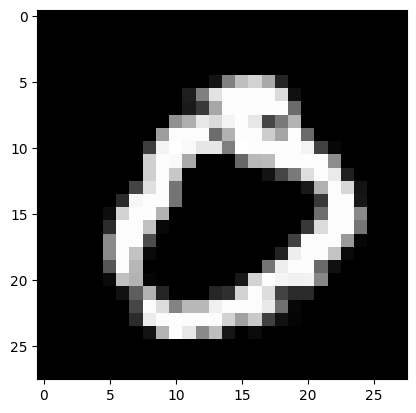

Prediction:  [8]
Label:  9


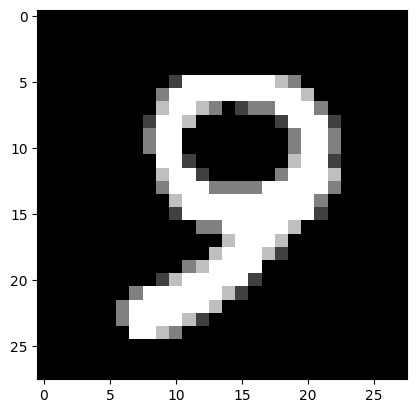

Prediction:  [7]
Label:  7


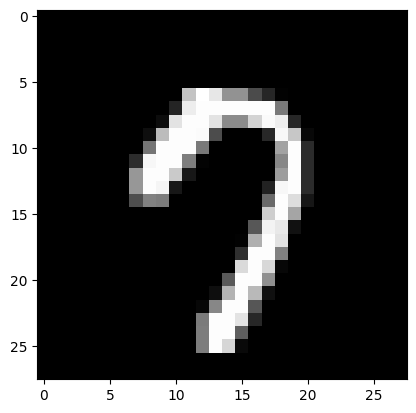

Prediction:  [3]
Label:  3


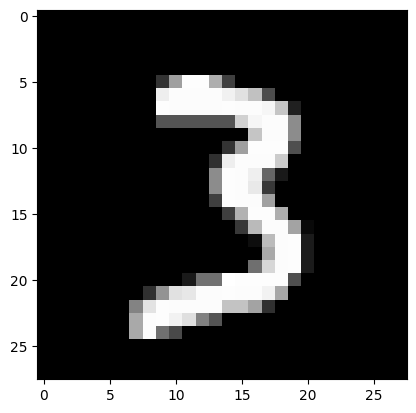

In [16]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)